<a href="https://colab.research.google.com/github/jaworskamalgorzata99-GIT/Maching-Learning-Bootcamp/blob/main/supervised/grid_search/03_grid_search.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn

In [2]:
!pip install --upgrade scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 82.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


###Import bibliotek

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

###Wygenerowanie danych

In [4]:
raw_data = make_moons(n_samples=2000, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[ 1.58230488  0.36687604]
 [ 0.32765354  0.98236569]
 [ 0.48826986 -0.2467652 ]
 [-0.93742051 -0.02942909]
 [ 0.63439695 -0.41222371]]

[1 0 1 0 1]


In [6]:
df = pd.DataFrame(data=np.c_[data,target], columns=['x1','x2','target'])
df.head()

,x1,x2,target
0,1.582305,0.366876,1.0
1,0.327654,0.982366,0.0
2,0.488270,-0.246765,1.0
3,-0.937421,-0.029429,0.0
4,0.634397,-0.412224,1.0


###Wizualizacja danych

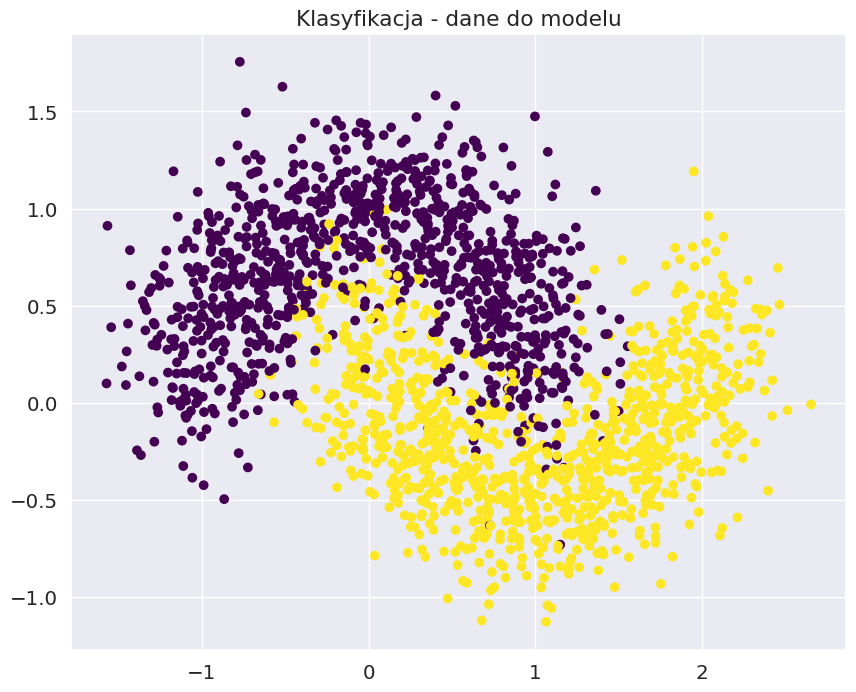

In [9]:
plt.figure(figsize=(10,8))
plt.scatter(data[:,0], data[:,1], c=target, cmap='viridis')
plt.title('Klasyfikacja - dane do modelu')
plt.show()

###Podział na zbiór treningowy i testowy

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1500, 2)
y_train shape: (1500,)
X_test shape: (500, 2)
y_test shape: (500,)


###Wizualizacja zbioru treningowego i testowego

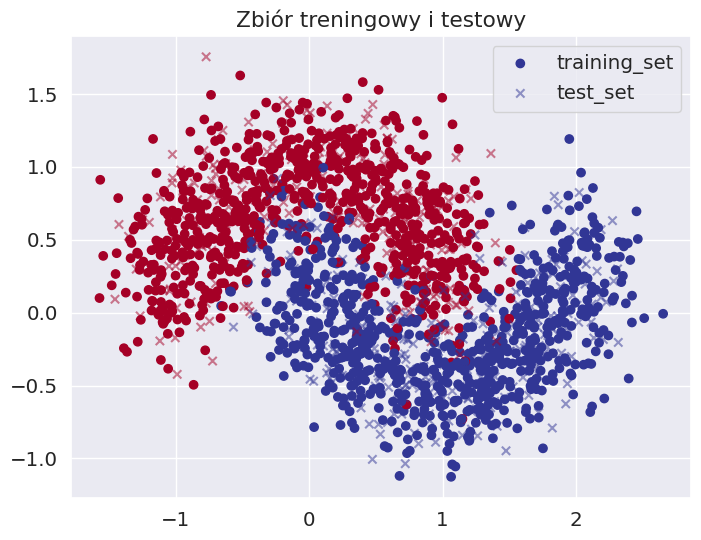

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu', label='training_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('Zbiór treningowy i testowy')
plt.legend()
plt.show()

###Wybór optymalnych hiperparametrów - Grid Search

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'max_depth': np.arange(1,10),
          'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(classifier, param_grid=params, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'max_depth': array([1, 2, ..., 6, 7, 8, 9]), 'min_samples_leaf': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [16]:
grid_search.best_params_

{'max_depth': np.int64(6), 'min_samples_leaf': 6}

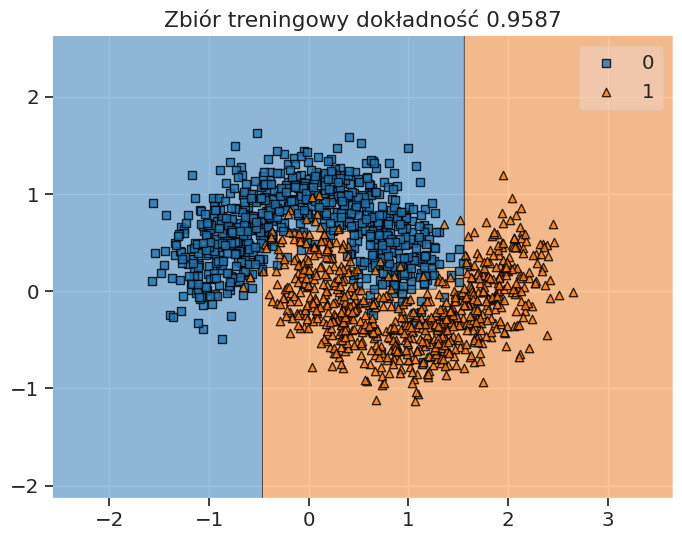

In [18]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy dokładność {grid_search.score(X_train, y_train):.4f}')
plt.show()

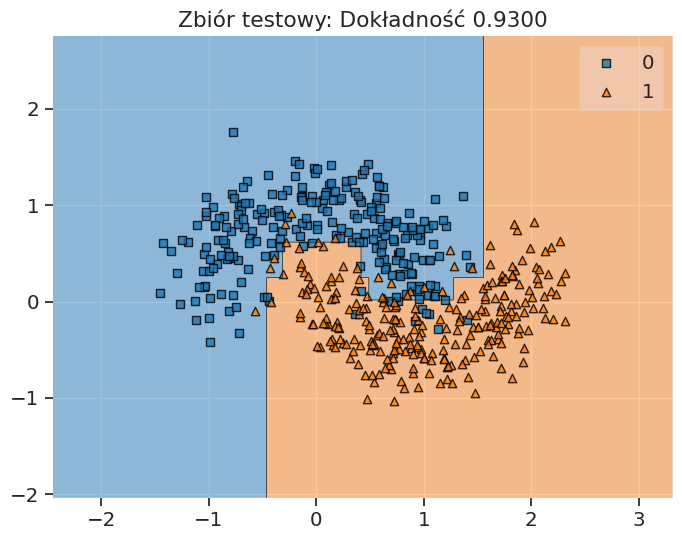

In [21]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: Dokładność {grid_search.score(X_test,y_test):.4f}')
plt.show()

n_jobs=-1 in scikit-learn's GridSearchCV means that all available CPU cores will be used for computation. This can significantly speed up the process of finding the best hyperparameters, especially when dealing with large datasets or complex models, by running different parameter combinations in parallel.

In [22]:
from sklearn.model_selection import GridSearchCV

classifier = DecisionTreeClassifier()

params = {'criterion':['gini', 'entropy'],
          'max_depth': np.arange(1,10),
          'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10,15,20]}

grid_search = GridSearchCV(classifier, param_grid=params, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': array([1, 2, ..., 6, 7, 8, 9]), 'min_samples_leaf': [1, 2, ...]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [23]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': np.int64(6), 'min_samples_leaf': 6}

In [24]:
grid_search.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,np.int64(6)
,min_samples_split,2
,min_samples_leaf,6
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


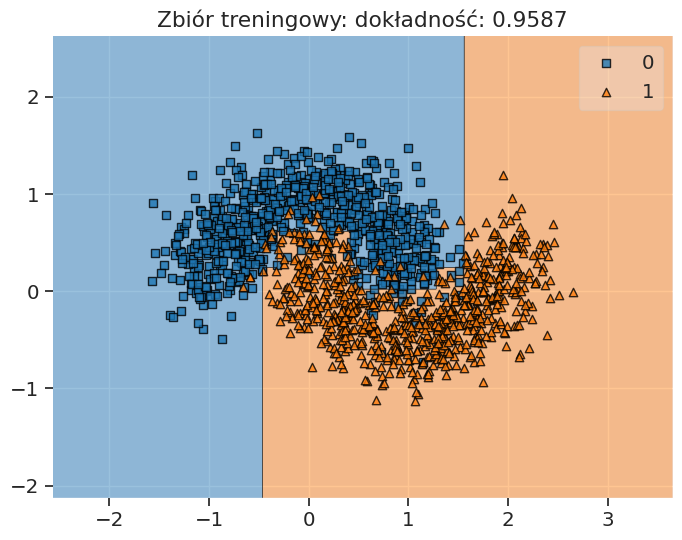

In [27]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność: {grid_search.score(X_train, y_train):.4f}')
plt.show()

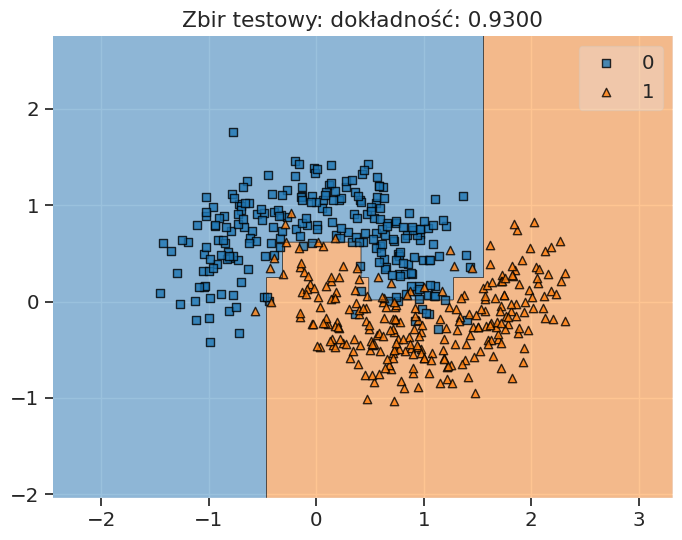

In [28]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbir testowy: dokładność: {grid_search.score(X_test, y_test):.4f}')
plt.show()

In [30]:
classifier = DecisionTreeClassifier(random_state=42)

param_grid = [
    {'criterion':['gini'], 'max_depth':[1,2,3,4,5]},
    {'criterion':['entropy'], 'min_samples_leaf':[2,3,4,5]}
]

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"[{'criterion': ['gini'], 'max_depth': [1, 2, ...]}, {'criterion': ['entropy'], 'min_samples_leaf': [2, 3, ...]}]"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [32]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [33]:
grid_search.best_estimator_

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(4,10),
    'min_samples_leaf': [4,5,6,7,8,9,10],
    'n_estimators': [50]
}

grid_search = GridSearchCV(classifier, param_grid=param_grid, n_jobs=-1, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': array([4, 5, 6, 7, 8, 9]), 'min_samples_leaf': [4, 5, ...], 'n_estimators': [50]}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [35]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': np.int64(8),
 'min_samples_leaf': 4,
 'n_estimators': 50}

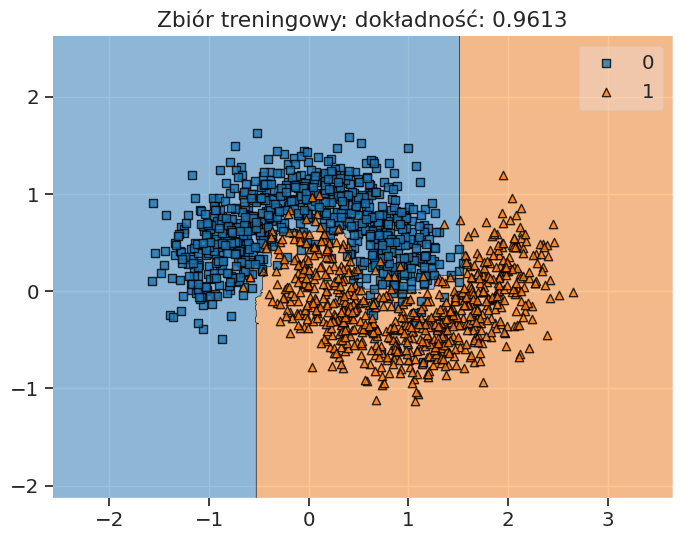

In [36]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_train, y_train, grid_search)
plt.title(f'Zbiór treningowy: dokładność: {grid_search.score(X_train, y_train):.4f}')
plt.show()

Text(0.5, 1.0, 'Zbiór testowy: dokładność: 0.9320')

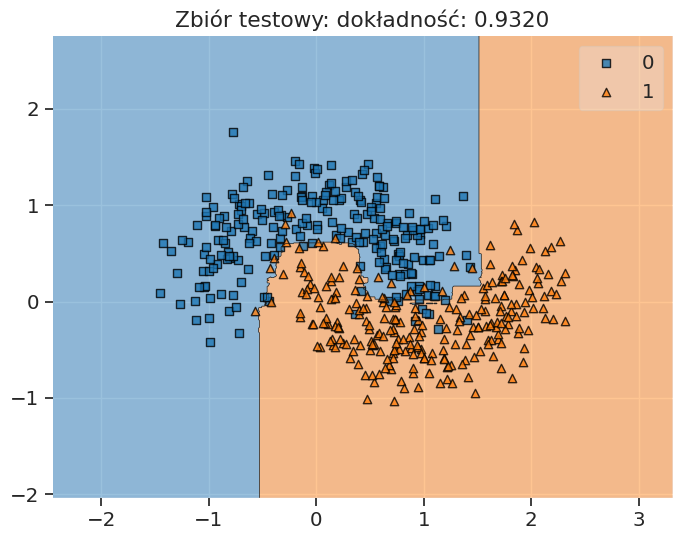

In [37]:
plt.figure(figsize=(8,6))
plot_decision_regions(X_test, y_test, grid_search)
plt.title(f'Zbiór testowy: dokładność: {grid_search.score(X_test, y_test):.4f}')